# Imports

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import scipy
import warnings

from common.baseclasses import AWA
from NearFieldOptics import Materials as M
from NearFieldOptics.Materials import TransferMatrixMedia as TMM
from NearFieldOptics import TipModels as T
#warnings.simplefilter("ignore")

<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "Bi2Se3_epsilon.pickle"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "PMMA_epsilon.pickle"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "sio2_300nm_extracted_epsilon_cone_A=2a.pickle"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "TaS2_eps_230K.csv"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "TaS2_eps_30K.csv"...


/Users/alexandersmcleod/tools/python/common/baseclasses.py:473: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  try: result=ndarray_operator(self,*args,**kwargs)
/Users/alexandersmcleod/tools/python/common/baseclasses.py:482: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  for axis_grid in axis_grids]


<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "Erik_BSTS_epsilon.pickle"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "VO2_295K.csv"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "VO2_360K.csv"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "Stewart_V2O3film_insulating.csv"...
<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "Stewart_V2O3film_metallic.csv"...


This package works best (or is at least verified to work with:
* numpy 1.16.6
* matplotlib 3.3.0
* scipy 1.2.1

In [2]:
print(np.__version__)
print(matplotlib.__version__)
print(scipy.__version__)

1.16.6
3.3.0
1.2.1


# ArrayWithAxes (AWA)
AWAs are incredibly useful constructs if you're going to be intensively using NearFieldOptics. They are classes which allow the programmer to attach a set of axes to an array which make them very useful for representing functions. Below is a very simple example of using AWAs but, as the number of axes increases, so does the utility of using AWAs...

## Plotting
Say that I want to plot an array as a function of another array. Maybe I have 2 arrays which are both functions of a common array that I want to sum...

### Working without AWAs

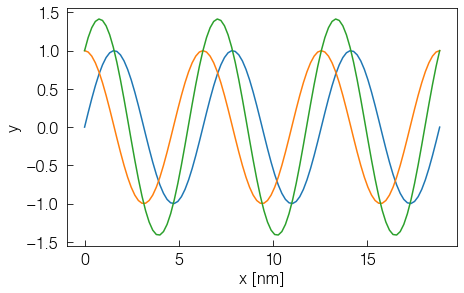

In [3]:
x = np.linspace(0,6*np.pi,100)
y1 = np.sin(x)
y2 = np.cos(x)
y_sum = y1+y2

plt.figure(figsize=(7,4))
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y_sum)
plt.xlabel("x [nm]")
plt.ylabel("y");

### Working with AWAs

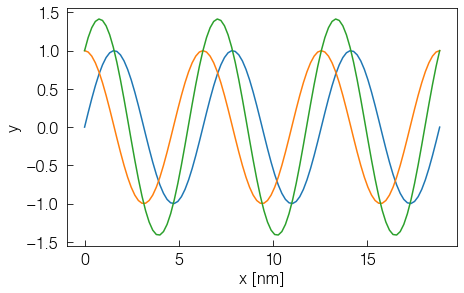

In [4]:
x = np.linspace(0,6*np.pi,100)
y1 = np.sin(x)
y2 = np.cos(x)

plt.figure(figsize=(7,4))
y1_AWA = AWA(y1, axes=[x], axis_names=["x [nm]"])
y2_AWA = AWA(y2, axes=[x], axis_names=["x [nm]"])

y1_AWA.plot()
y2_AWA.plot()
(y1_AWA+y2_AWA).plot()
plt.ylabel("y");

## Value extraction
Let's say I have an array y = sin(x) which is a function of array x and I would like to know what is the value of y at the point x=0.83728. Chances are slim that this specific value happens to be in my x array so there is an unnecessarily involved procedure to figure this out without AWAs.

### Working without AWAs

In [5]:
x = np.linspace(0,6*np.pi,100)
y = np.sin(x)
my_x = 0.83728
closest_idx = np.argmin(np.abs(x-my_x))
my_y = y[closest_idx]
print("Value at {}: {}".format(my_x, my_y))

Value at 0.83728: 0.6900790114821119


### Working with AWAs

In [6]:
x = np.linspace(0,6*np.pi,100)
y = np.sin(x)
y_AWA = AWA(y,axes=[x],axis_names=["x [nm]"])
my_x = 0.83728
my_y = y_AWA.cslice[my_x]
print("Value at {}: {}".format(my_x, my_y))

Value at 0.83728: 0.6900790114821119


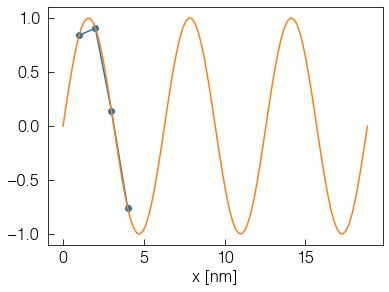

In [7]:
y_AWA.interpolate_axis([1,2,3,4],axis=0).plot(marker='o')
y_AWA.plot()

# Creating Materials

## Get a list of materials available from NearFieldOptics

In [8]:
print("Materials readily available from NearFieldOptics:")
for name,val in vars(M).items():
    if isinstance(val,M.Material):
        print("\tM.{}".format(name))

Materials readily available from NearFieldOptics:
	M.Air
	M.Al2O3
	M.Al2O3_2
	M.Au
	M.Bi2Se3_Bulk
	M.BN_GPR
	M.BN_STW
	M.BN_Caldwell
	M.Forsterite
	M.FePO4
	M.FePO4_2
	M.LiFePO4
	M.LiFePO4_calc
	M.PMMA
	M.PZT
	M.Si
	M.Si_Doped
	M.SiO2
	M.SiC_4H
	M.SiC_4H_2
	M.SiC_4H_Dispersive
	M.SiC_6H
	M.SiC_6H_2
	M.SiC_6H_Ellips
	M.SiC_3C
	M.SiN4_Bulk
	M.SiO2_Fei
	M.SiO2_300nmFei
	M.SiO2_Bulk
	M.SiO2_300nm
	M.SiO2_300nm2
	M.SiO2_300nm2_test
	M.SiO2_144nm
	M.TaS2_NCCDW
	M.TaS2_metal
	M.TaS2_CCDW
	M.BSTS_35nm_Bulk
	M.VO2_Insulating
	M.VO2_Metallic
	M.V2O3_Insulating
	M.V2O3_Metallic


## Isotropic materials

In [9]:
# Grab the built-in instance of silicon oxide from NearFieldOptics.Materials:
sapphire = M.Al2O3

<>:2: DeprecationWarning: invalid escape sequence \o
<>:3: DeprecationWarning: invalid escape sequence \e
<>:4: DeprecationWarning: invalid escape sequence \e
<>:2: DeprecationWarning: invalid escape sequence \o
<>:3: DeprecationWarning: invalid escape sequence \e
<>:4: DeprecationWarning: invalid escape sequence \e
<>:2: DeprecationWarning: invalid escape sequence \o
<>:3: DeprecationWarning: invalid escape sequence \e
<>:4: DeprecationWarning: invalid escape sequence \e
/var/folders/67/32mwwcnj2pl1mtqhfc7mzlz80000gn/T/ipykernel_16546/608149437.py:2: DeprecationWarning: invalid escape sequence \o
  eps = AWA(sapphire.extraordinary_epsilon(ws),axes=[ws],axis_names=["$\omega$ [cm$^{-1}$]"])
/var/folders/67/32mwwcnj2pl1mtqhfc7mzlz80000gn/T/ipykernel_16546/608149437.py:3: DeprecationWarning: invalid escape sequence \e
  eps.real.plot(label="Re[$\epsilon$]")
/var/folders/67/32mwwcnj2pl1mtqhfc7mzlz80000gn/T/ipykernel_16546/608149437.py:4: DeprecationWarning: invalid escape sequence \e
  eps

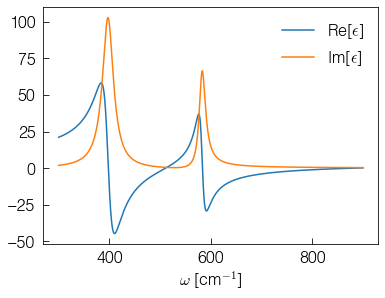

In [10]:
ws = np.linspace(300,900,1500)
eps = AWA(sapphire.extraordinary_epsilon(ws),axes=[ws],axis_names=["$\omega$ [cm$^{-1}$]"])
eps.real.plot(label="Re[$\epsilon$]")
eps.imag.plot(label="Im[$\epsilon$]")
plt.legend();

In [11]:
sapphire.phonon_params

[[(387.6, 15.5, 385, 16.5),
  (481.68, 9.5, 439.1, 15.5),
  (629.5, 29.5, 569, 23.5),
  (906.6, 73.5, 633.63, 25)],
 [(387.6, 15.5, 385, 16.5),
  (481.68, 9.5, 439.1, 15.5),
  (629.5, 29.5, 569, 23.5),
  (906.6, 73.5, 633.63, 25)],
 [(510.87, 5.5, 397.52, 26.5), (881.1, 77.0, 582.41, 15)]]

## Gold

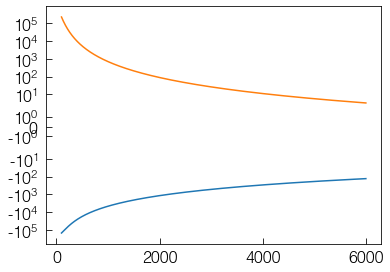

In [12]:
freqs=np.linspace(100,6000,1000)
eps=M.Au.epsilon(freqs)
plt.plot(freqs,eps.real)
plt.plot(freqs,eps.imag)
plt.gca().set_yscale('symlog')

## VO2

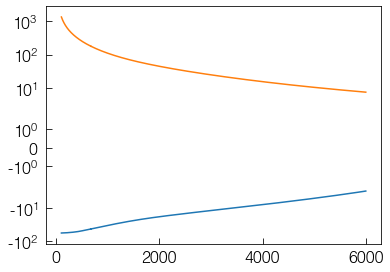

In [13]:
freqs=np.linspace(100,6000,1000)
eps=M.VO2_Metallic.epsilon(freqs)
plt.plot(freqs,eps.real)
plt.plot(freqs,eps.imag)
plt.gca().set_yscale('symlog')

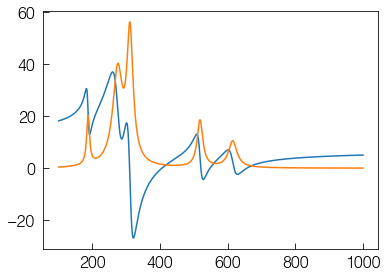

In [14]:
freqs=np.linspace(100,1000,1000)
eps=M.VO2_Insulating.epsilon(freqs)
plt.plot(freqs,eps.real)
plt.plot(freqs,eps.imag)
#plt.gca().set_yscale('symlog')
#plt.ylim(-10,10)

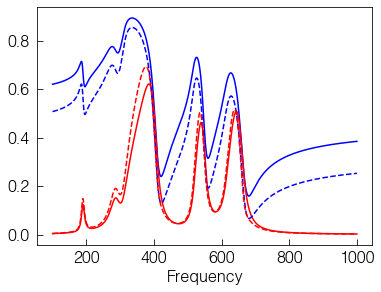

In [15]:
rp = M.VO2_Insulating.reflection_p(freqs,angle=0)
np.abs(rp).plot(color='b')
np.imag(rp).plot(color='r')
rp = M.VO2_Insulating.reflection_p(freqs,angle=45)
np.abs(rp).plot(color='b',ls='--')
np.imag(rp).plot(color='r',ls='--')
#plt.clim(0,3)
#plt.gca().set_xscale('log')

Note that the p- and s-polarized reflection coefficients differ only by a factor of -1 for normal incidence, owing only to a difference in their definition of the field direction (Novotny Ch. 1)

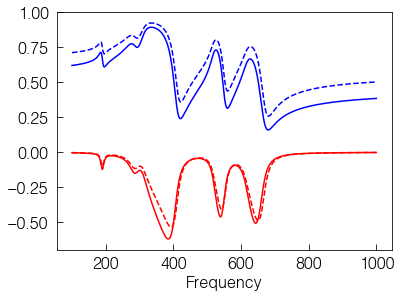

In [16]:
rs = M.VO2_Insulating.reflection_s(freqs,angle=0)
np.abs(rs).plot(color='b')
np.imag(rs).plot(color='r')
rs = M.VO2_Insulating.reflection_s(freqs,angle=45)
np.abs(rs).plot(color='b',ls='--')
np.imag(rs).plot(color='r',ls='--')
#plt.clim(0,3)
#plt.gca().set_xscale('log')

## Anisotropic materials

In [17]:
# Grab the built-in instance of SiC4H from NearFieldOptics.Materials:
SiC_4H = M.SiC_4H

In [18]:
SiC_4H.eps_lps

[[(2022247.5263999996, 796.6, 5.3584)],
 [(2022247.5263999996, 796.6, 5.3584)],
 [(2167572.7800000003, 782.0, 5.3584)]]

<>:2: DeprecationWarning: invalid escape sequence \o
<>:3: DeprecationWarning: invalid escape sequence \o
<>:4: DeprecationWarning: invalid escape sequence \o
<>:6: DeprecationWarning: invalid escape sequence \e
<>:7: DeprecationWarning: invalid escape sequence \e
<>:8: DeprecationWarning: invalid escape sequence \e
<>:9: DeprecationWarning: invalid escape sequence \e
<>:10: DeprecationWarning: invalid escape sequence \e
<>:11: DeprecationWarning: invalid escape sequence \e
<>:2: DeprecationWarning: invalid escape sequence \o
<>:3: DeprecationWarning: invalid escape sequence \o
<>:4: DeprecationWarning: invalid escape sequence \o
<>:6: DeprecationWarning: invalid escape sequence \e
<>:7: DeprecationWarning: invalid escape sequence \e
<>:8: DeprecationWarning: invalid escape sequence \e
<>:9: DeprecationWarning: invalid escape sequence \e
<>:10: DeprecationWarning: invalid escape sequence \e
<>:11: DeprecationWarning: invalid escape sequence \e
<>:2: DeprecationWarning: invalid escape s

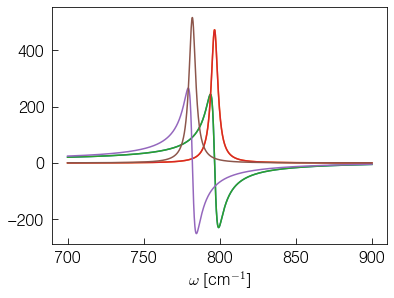

In [19]:
ws = np.linspace(700,900,1500)
eps_x = AWA([eps[0,0] for eps in SiC_4H.epsilon_anisotropic(ws)],axes=[ws],axis_names=["$\omega$ [cm$^{-1}$]"])
eps_y = AWA([eps[1,1] for eps in SiC_4H.epsilon_anisotropic(ws)],axes=[ws],axis_names=["$\omega$ [cm$^{-1}$]"])
eps_z = AWA([eps[2,2] for eps in SiC_4H.epsilon_anisotropic(ws)],axes=[ws],axis_names=["$\omega$ [cm$^{-1}$]"])

eps_x.real.plot(label="Re[$\epsilon_x$]")
eps_x.imag.plot(label="Im[$\epsilon_x$]")
eps_y.real.plot(label="Re[$\epsilon_y$]")
eps_y.imag.plot(label="Im[$\epsilon_y$]")
eps_z.real.plot(label="Re[$\epsilon_z$]")
eps_z.imag.plot(label="Im[$\epsilon_z$]")

#plt.legend();

## Graphene

In [20]:
# Instantiate an instance of single layer graphene with:
#    mu    = 2400 1/cm = 297.6 meV
#    gamma = 20 1/cm
Graphene = M.SingleLayerGraphene(chemical_potential=200, gamma=20)

<>:3: DeprecationWarning: invalid escape sequence \o
<>:6: DeprecationWarning: invalid escape sequence \s
<>:7: DeprecationWarning: invalid escape sequence \s
<>:10: DeprecationWarning: invalid escape sequence \s
<>:3: DeprecationWarning: invalid escape sequence \o
<>:6: DeprecationWarning: invalid escape sequence \s
<>:7: DeprecationWarning: invalid escape sequence \s
<>:10: DeprecationWarning: invalid escape sequence \s
<>:3: DeprecationWarning: invalid escape sequence \o
<>:6: DeprecationWarning: invalid escape sequence \s
<>:7: DeprecationWarning: invalid escape sequence \s
<>:10: DeprecationWarning: invalid escape sequence \s
/var/folders/67/32mwwcnj2pl1mtqhfc7mzlz80000gn/T/ipykernel_16546/1609079407.py:3: DeprecationWarning: invalid escape sequence \o
  sigma = AWA(Graphene.conductivity(ws),axes=[ws],axis_names=["$\omega$ [cm$^{-1}$]"])
/var/folders/67/32mwwcnj2pl1mtqhfc7mzlz80000gn/T/ipykernel_16546/1609079407.py:6: DeprecationWarning: invalid escape sequence \s
  sigma.real.plo

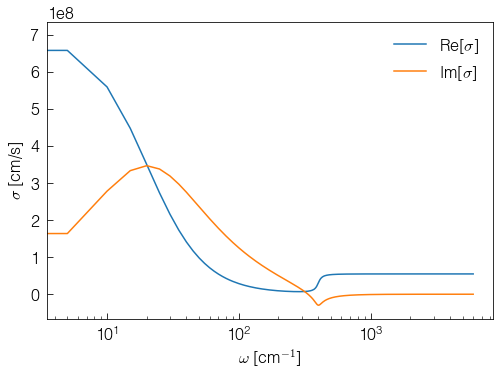

In [21]:
ws = np.linspace(0,6000,1200)
qs = np.linspace(1e3, 1e6, 100)
sigma = AWA(Graphene.conductivity(ws),axes=[ws],axis_names=["$\omega$ [cm$^{-1}$]"])

plt.figure(figsize=(8,5))
sigma.real.plot(label="Re[$\sigma$]")
sigma.imag.plot(label="Im[$\sigma$]")

plt.legend()
plt.ylabel("$\sigma$ [cm/s]");
plt.xscale("log")

### Effect of chemical potential

<>:5: DeprecationWarning: invalid escape sequence \o
<>:6: DeprecationWarning: invalid escape sequence \s
<>:7: DeprecationWarning: invalid escape sequence \s
<>:5: DeprecationWarning: invalid escape sequence \o
<>:6: DeprecationWarning: invalid escape sequence \s
<>:7: DeprecationWarning: invalid escape sequence \s
<>:5: DeprecationWarning: invalid escape sequence \o
<>:6: DeprecationWarning: invalid escape sequence \s
<>:7: DeprecationWarning: invalid escape sequence \s
/var/folders/67/32mwwcnj2pl1mtqhfc7mzlz80000gn/T/ipykernel_16546/1449145315.py:5: DeprecationWarning: invalid escape sequence \o
  sigma = AWA(Graphene.conductivity(ws),axes=[ws],axis_names=["$\omega$ [cm$^{-1}$]"])
/var/folders/67/32mwwcnj2pl1mtqhfc7mzlz80000gn/T/ipykernel_16546/1449145315.py:6: DeprecationWarning: invalid escape sequence \s
  sigma.real.plot(label="Re[$\sigma$], $\mu$={} 1/cm".format(mu))
/var/folders/67/32mwwcnj2pl1mtqhfc7mzlz80000gn/T/ipykernel_16546/1449145315.py:7: DeprecationWarning: invalid es

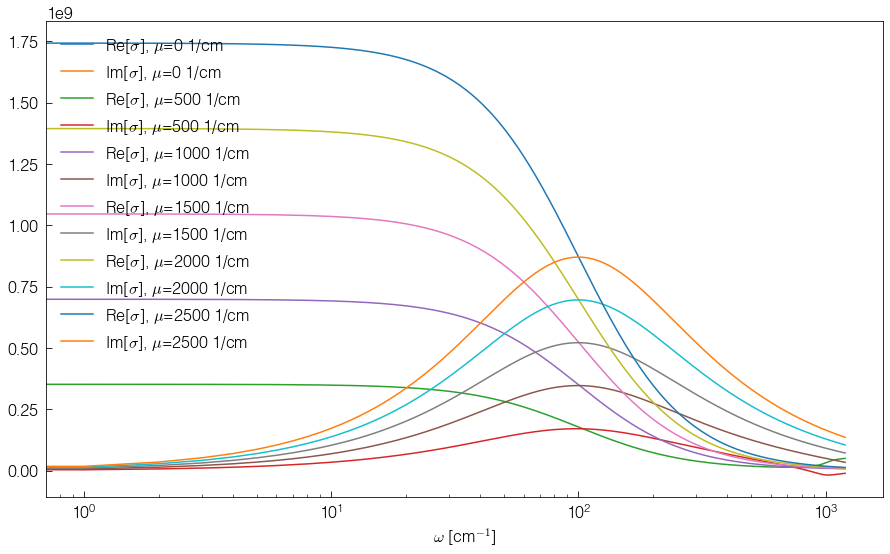

In [22]:
ws = np.linspace(0,1200,1200)
plt.figure(figsize=(15,8))
for mu in np.arange(0,3000,500):
    Graphene = M.SingleLayerGraphene(chemical_potential=mu, gamma=100)
    sigma = AWA(Graphene.conductivity(ws),axes=[ws],axis_names=["$\omega$ [cm$^{-1}$]"])
    sigma.real.plot(label="Re[$\sigma$], $\mu$={} 1/cm".format(mu))
    sigma.imag.plot(label="Im[$\sigma$], $\mu$={} 1/cm".format(mu))
plt.xscale("log")
plt.legend();

## hBN

In [23]:
# Grab the built-in instance of hBN from NearFieldOptics.Materials:
hBN = M.BN_Caldwell

<>:4: DeprecationWarning: invalid escape sequence \o
<>:5: DeprecationWarning: invalid escape sequence \o
<>:6: DeprecationWarning: invalid escape sequence \o
<>:8: DeprecationWarning: invalid escape sequence \e
<>:9: DeprecationWarning: invalid escape sequence \e
<>:10: DeprecationWarning: invalid escape sequence \e
<>:11: DeprecationWarning: invalid escape sequence \e
<>:12: DeprecationWarning: invalid escape sequence \e
<>:13: DeprecationWarning: invalid escape sequence \e
<>:15: DeprecationWarning: invalid escape sequence \e
<>:4: DeprecationWarning: invalid escape sequence \o
<>:5: DeprecationWarning: invalid escape sequence \o
<>:6: DeprecationWarning: invalid escape sequence \o
<>:8: DeprecationWarning: invalid escape sequence \e
<>:9: DeprecationWarning: invalid escape sequence \e
<>:10: DeprecationWarning: invalid escape sequence \e
<>:11: DeprecationWarning: invalid escape sequence \e
<>:12: DeprecationWarning: invalid escape sequence \e
<>:13: DeprecationWarning: invalid esc

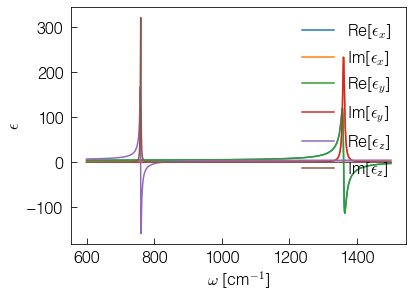

In [24]:
ws = np.linspace(600,1500,900)
eps = hBN.epsilon_anisotropic(ws)

eps_x = AWA([e[0,0] for e in eps], axes=[ws], axis_names=["$\omega$ [cm$^{-1}$]"])
eps_y = AWA([e[1,1] for e in eps], axes=[ws], axis_names=["$\omega$ [cm$^{-1}$]"])
eps_z = AWA([e[2,2] for e in eps], axes=[ws], axis_names=["$\omega$ [cm$^{-1}$]"])

eps_x.real.plot(label="Re[$\epsilon_x$]")
eps_x.imag.plot(label="Im[$\epsilon_x$]")
eps_y.real.plot(label="Re[$\epsilon_y$]")
eps_y.imag.plot(label="Im[$\epsilon_y$]")
eps_z.real.plot(label="Re[$\epsilon_z$]")
eps_z.imag.plot(label="Im[$\epsilon_z$]")

plt.ylabel("$\epsilon$")
plt.legend();

## Tabulated materials
If you have the optical constants for a material which is not included in the NearFieldOptics package, it is straightforward to create a Material instance of your custom material.

### Isotropic (example: WS$_2$)
Please see "NearFieldOptics/Materials/Tabulated/WS2.csv" for example of isotropic optical constant file.

In [25]:
WS2 = M.TabulatedMaterialFromFile("WS2.csv")

<material_types.TabulatedMaterialFromFile.__init__>:
	Loading tabulated material data from file "WS2.csv"...


<>:2: DeprecationWarning: invalid escape sequence \o
<>:3: DeprecationWarning: invalid escape sequence \e
<>:4: DeprecationWarning: invalid escape sequence \e
<>:2: DeprecationWarning: invalid escape sequence \o
<>:3: DeprecationWarning: invalid escape sequence \e
<>:4: DeprecationWarning: invalid escape sequence \e
<>:2: DeprecationWarning: invalid escape sequence \o
<>:3: DeprecationWarning: invalid escape sequence \e
<>:4: DeprecationWarning: invalid escape sequence \e
/var/folders/67/32mwwcnj2pl1mtqhfc7mzlz80000gn/T/ipykernel_16546/2922213709.py:2: DeprecationWarning: invalid escape sequence \o
  eps = AWA(WS2.epsilon(ws),axes=[ws],axis_names=["$\omega$ [cm$^{-1}$]"])
/var/folders/67/32mwwcnj2pl1mtqhfc7mzlz80000gn/T/ipykernel_16546/2922213709.py:3: DeprecationWarning: invalid escape sequence \e
  eps.real.plot(label="Re[$\epsilon$]")
/var/folders/67/32mwwcnj2pl1mtqhfc7mzlz80000gn/T/ipykernel_16546/2922213709.py:4: DeprecationWarning: invalid escape sequence \e
  eps.imag.plot(label

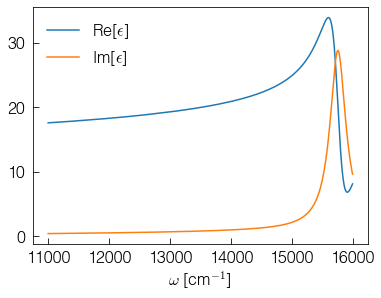

In [26]:
ws = np.linspace(11000,16000,5000)
eps = AWA(WS2.epsilon(ws),axes=[ws],axis_names=["$\omega$ [cm$^{-1}$]"])
eps.real.plot(label="Re[$\epsilon$]")
eps.imag.plot(label="Im[$\epsilon$]")
plt.legend();

### Anisotropic (example: BN)
Please see "NearFieldOptics/Materials/Tabulated/BN_anis.csv" for example of anisotropic optical constant file.

In [27]:
BN = M.TabulatedAnisotropicMaterialFromFile("BN_anis.csv")

<material_types.TabulatedAnisotropicMaterialFromFile.__init__>:
	Loading tabulated material data from file "/Users/alexandersmcleod/tools/python/NearFieldOptics/Materials/Tabulated/BN_anis.csv"...


<>:2: DeprecationWarning: invalid escape sequence \o
<>:3: DeprecationWarning: invalid escape sequence \o
<>:4: DeprecationWarning: invalid escape sequence \o
<>:6: DeprecationWarning: invalid escape sequence \e
<>:7: DeprecationWarning: invalid escape sequence \e
<>:8: DeprecationWarning: invalid escape sequence \e
<>:9: DeprecationWarning: invalid escape sequence \e
<>:10: DeprecationWarning: invalid escape sequence \e
<>:11: DeprecationWarning: invalid escape sequence \e
<>:2: DeprecationWarning: invalid escape sequence \o
<>:3: DeprecationWarning: invalid escape sequence \o
<>:4: DeprecationWarning: invalid escape sequence \o
<>:6: DeprecationWarning: invalid escape sequence \e
<>:7: DeprecationWarning: invalid escape sequence \e
<>:8: DeprecationWarning: invalid escape sequence \e
<>:9: DeprecationWarning: invalid escape sequence \e
<>:10: DeprecationWarning: invalid escape sequence \e
<>:11: DeprecationWarning: invalid escape sequence \e
<>:2: DeprecationWarning: invalid escape s

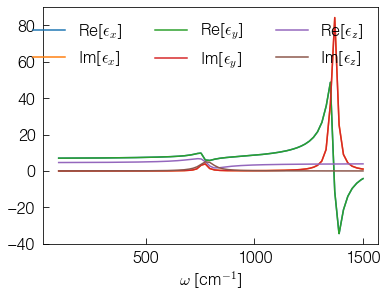

In [28]:
ws = np.linspace(100,1500,1400)
eps_x = AWA(BN.ordinary_epsilon(ws), axes=[ws], axis_names=["$\omega$ [cm$^{-1}$]"])
eps_y = AWA(BN.ordinary_epsilon(ws), axes=[ws], axis_names=["$\omega$ [cm$^{-1}$]"])
eps_z = AWA(BN.extraordinary_epsilon(ws), axes=[ws], axis_names=["$\omega$ [cm$^{-1}$]"])

eps_x.real.plot(label="Re[$\epsilon_x$]")
eps_x.imag.plot(label="Im[$\epsilon_x$]")
eps_y.real.plot(label="Re[$\epsilon_y$]")
eps_y.imag.plot(label="Im[$\epsilon_y$]")
eps_z.real.plot(label="Re[$\epsilon_z$]")
eps_z.imag.plot(label="Im[$\epsilon_z$]")

plt.legend(ncol=3);

# Layered structures
In this example, we will recreate the structure from Siyuan Dai's 2015 Nature paper "Graphene on hexagonal boron nitride as a tunable hyperbolic metamaterial" (https://www.nature.com/articles/nnano.2015.131).

As such, we will create a layered structure with: <br>
    ---------- Graphene ----------- <br>
    ---------- 58 nm hBN ---------- <br> 
    --------- 300 nm SiO2 --------- <br>
    ------------- Si --------------       

## Gather our materials

In [29]:
# Graphene with:
#    - Reasonable room temperature gamma = 20 1/cm
#    - Chemical potential = 370 meV = 2984.25 1/cm
Graphene = M.SingleLayerGraphene(chemical_potential=2984.25, gamma=20)
BN = M.BN_Caldwell
Si = M.Si
SiO2 = M.SiO2_300nm

## Create a LayeredMedia object

In [30]:
Layers = [
    Graphene,
    (BN,   58e-7),
    (SiO2, 300e-7)
]
Heterostructure = M.LayeredMediaTM(*Layers, exit = Si, entrance=M.Air)

## Calculate $r_p(\omega,q)$

In [31]:
ws = np.linspace(600,1800,1200)
qs = np.linspace(1e4, 3e6, 500); q0=1/10e-7
rp = Heterostructure.reflection_p(ws,qs).T

### Comparison to data

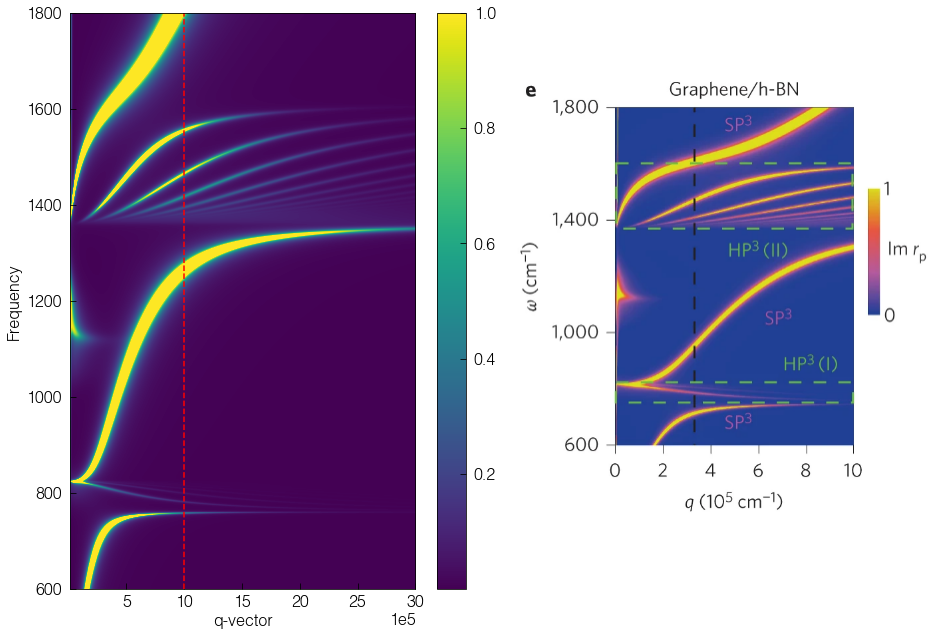

In [32]:
fig,ax = plt.subplots(figsize=(12,8),nrows=1,ncols=2)

plt.sca(ax[0])
rp.imag.plot(vmax=1)
plt.gca().ticklabel_format(axis="x", style="sci", scilimits=[5,5])
plt.axvline(q0,color='r',ls='--')

plt.sca(ax[1])
plt.imshow(mpimg.imread("./S_Dai_rp.png"))
plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())

## Calculate near-field signal

In [33]:
a=20           # Radius of tip apex for a near-field probe, in nanometers
q_a=1/(a*1e-7)        # This defines the characteristic in-plane momentum for near-fields in SNOM, in wavenumbers (cm-1)
Nqs = 244*2      # Number of q values at which to evaluate
Nzs = 12       # Number of z values at which to evaluate
A = 80         # Oscillation amplitude in nanometers
norm_at = 1000 # Frequency at which to normalize signal
norm_to=M.Au   # Material to which model will normalize signal (in this case, gold)

ws = np.linspace(600,1800,100)

S = T.LightningRodModel(ws, \
                       rp=Heterostructure.reflection_p,    \
                       a=a, Nqs=Nqs, Nzs=Nzs, amplitude=A, \
                       normalize_to=norm_to.reflection_p,  \
                       normalize_at=norm_at)

<__init__._LightningRodModel_.__call__>:
	Getting signal...
<__init__._LightningRodModel_.get_signal>:
	Computing near-field signal with Lightning Rod Model...
<__init__._LightningRodModel_.prepare_model>:
	Preparing model...
<__init__._LightningRodModel_.load_charge_data>:
	Loading charge data from file "/Users/alexandersmcleod/tools/python/NearFieldOptics/TipModels/ChargeData/HyperboloidCharge_L=6.33E+02_SkinDepth=5.00E-02_Taper=20_Quad=TS_Nzs=244_Nqs=244_freq=3.00E-03.pickle"...
	Using incident beam profile: "plane_wave"
	Incidence angle: 30 degrees
	Computing xWarp quadrature for q-values...
	PROGRESS: 0% - Computing state of the tip charge v. z & s at freq=600.0 cm^-1...
	PROGRESS: 1% - Computing state of the tip charge v. z & s at freq=612.1212121212121 cm^-1...
	PROGRESS: 2% - Computing state of the tip charge v. z & s at freq=624.2424242424242 cm^-1...
	PROGRESS: 3% - Computing state of the tip charge v. z & s at freq=636.3636363636364 cm^-1...
	PROGRESS: 4% - Computing state o

	PROGRESS: 81% - Computing state of the tip charge v. z & s at freq=1581.8181818181818 cm^-1...
	PROGRESS: 82% - Computing state of the tip charge v. z & s at freq=1593.939393939394 cm^-1...
	PROGRESS: 83% - Computing state of the tip charge v. z & s at freq=1606.060606060606 cm^-1...
	PROGRESS: 84% - Computing state of the tip charge v. z & s at freq=1618.181818181818 cm^-1...
	PROGRESS: 85% - Computing state of the tip charge v. z & s at freq=1630.3030303030303 cm^-1...
	PROGRESS: 86% - Computing state of the tip charge v. z & s at freq=1642.4242424242425 cm^-1...
	PROGRESS: 87% - Computing state of the tip charge v. z & s at freq=1654.5454545454545 cm^-1...
	PROGRESS: 88% - Computing state of the tip charge v. z & s at freq=1666.6666666666667 cm^-1...
	PROGRESS: 89% - Computing state of the tip charge v. z & s at freq=1678.7878787878788 cm^-1...
	PROGRESS: 90% - Computing state of the tip charge v. z & s at freq=1690.909090909091 cm^-1...
	PROGRESS: 91% - Computing state of the tip 

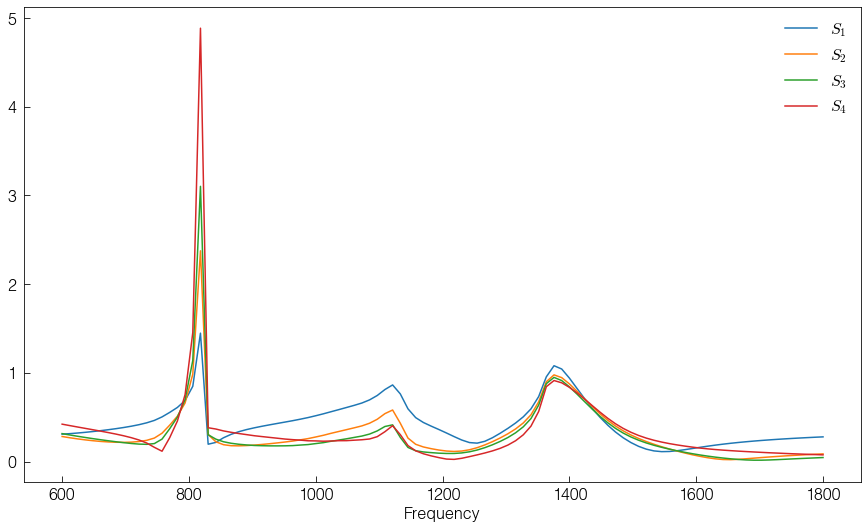

In [34]:
plt.figure(figsize=(15,8))
np.abs(S["signal_1"]).plot(label="$S_1$")
np.abs(S["signal_2"]).plot(label="$S_2$")
np.abs(S["signal_3"]).plot(label="$S_3$")
np.abs(S["signal_4"]).plot(label="$S_4$")
plt.legend();

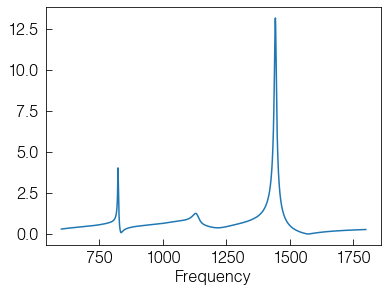

In [35]:
np.abs(rp.cslice[q_a/10,:]).plot()

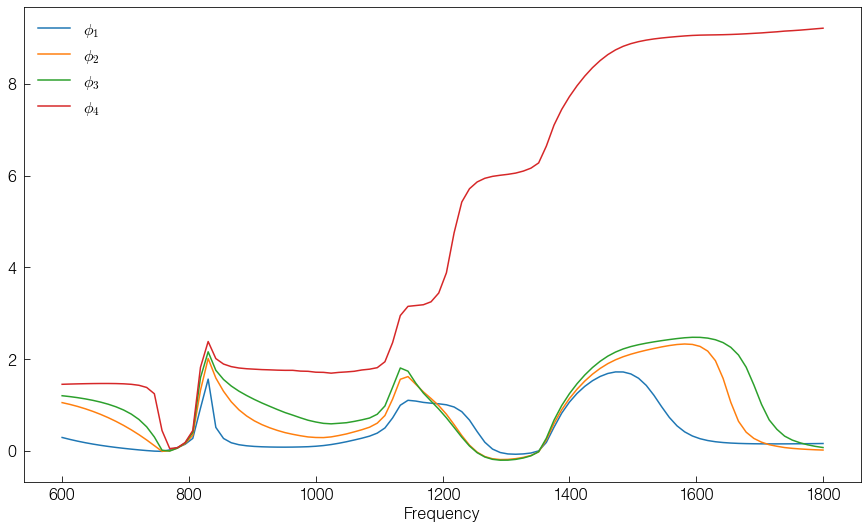

In [36]:
plt.figure(figsize=(15,8))
for n in np.arange(1,5):
    sn=S["signal_%i"%n]
    pn=AWA(np.unwrap(np.arctan2(sn.imag,sn.real)),adopt_axes_from=sn)
    pn.plot(label=r'$\phi_%i$'%n)
plt.legend();